In [20]:
# ref: https://medium.com/the-official-integrate-ai-blog/heres-what-you-need-to-know-about-propensity-modeling-521ab660cb43
# ref: https://github.com/benmiroglio/pymatch/blob/master/Example.ipynb
# ref: https://www.kdnuggets.com/2017/05/propensity-scores-primer.html
# ref: https://github.com/benmiroglio/pymatch/blob/master/Example.ipynb

In [24]:
import os
import pandas as pd
import numpy as np



import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import matcher modeule to peform prospensity modeling
from pymatch.Matcher import Matcher

In [32]:
path = 'data/lending-club-loan-data/loan.csv'

In [33]:
df = pd.read_csv(path)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4     12.69        67.79     B        B5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 74 columns]

In [34]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [35]:
fields = \
[
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "term",
    "int_rate",
    "installment",
    "grade",
    "sub_grade",
    "loan_status"
]
data = pd.read_csv(path)[fields]

In [36]:
test = data[ data.loan_status=='Default']
control = data[data.loan_status=='Fully Paid']

test['loan_status'] = 1
control['loan_status'] = 0

## Fit the Matcher

In [38]:
m = Matcher(test, control, yvar="loan_status",exclude=[])

Formula:
loan_status ~ loan_amnt+funded_amnt+funded_amnt_inv+term+int_rate+installment+grade+sub_grade
n majority: 207723
n minority: 1219


In [39]:
# hiher class imbalance 

In [40]:
m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 70.13%


In [41]:
# as accuracy is abobe 50% so there is enough seperablity in the data

In [42]:
m.predict_scores()

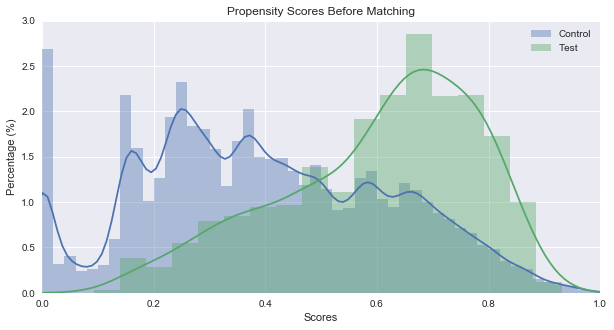

In [43]:
m.plot_scores()

In [44]:
# tune threshold

In [45]:
m.tune_threshold(method='random')

In [51]:
m.match(method='min', threshold=0.0001,nmatches=1)
m.record_frequency()

freq  n_records
0     1       2270
1     2         65
2     3         10
3     4          2

In [52]:
m.assign_weight_vector()

In [53]:
m.matched_data.sort_values("match_id").head(6)

record_id  weight  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0             0     1.0    18000.0      18000.0     17975.000000   60 months   
2350     202644     1.0     8200.0       8200.0      8200.000000   36 months   
1             1     1.0    21250.0      21250.0     21003.604048   60 months   
2039     174229     1.0    25625.0      25625.0     25625.000000   36 months   
2             2     1.0     5600.0       5600.0      5600.000000   60 months   
1940     160024     1.0    17600.0      17600.0     17600.000000   60 months   

      int_rate  installment grade sub_grade  loan_status    scores  match_id  
0        17.27       449.97     D        D3            1  0.641086         0  
2350     13.99       280.22     C        C4            0  0.641086         0  
1        14.27       497.43     C        C2            1  0.179287         1  
2039      7.90       801.82     A        A4            0  0.179283         1  
2        15.99       136.16     D        D2            1  0.783079         2  
1940     16.29       430.72     D        D2            0  0.783068         2

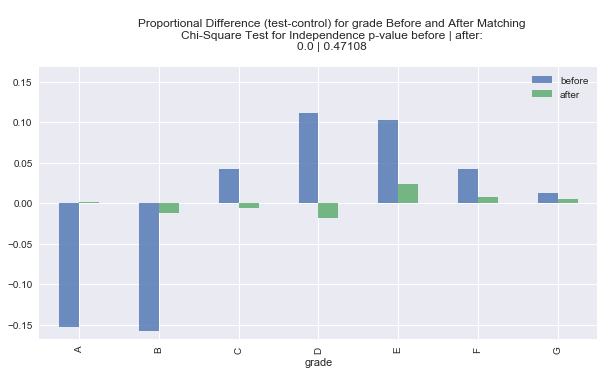

In [54]:
categorical_results = m.compare_categorical(return_table=True)


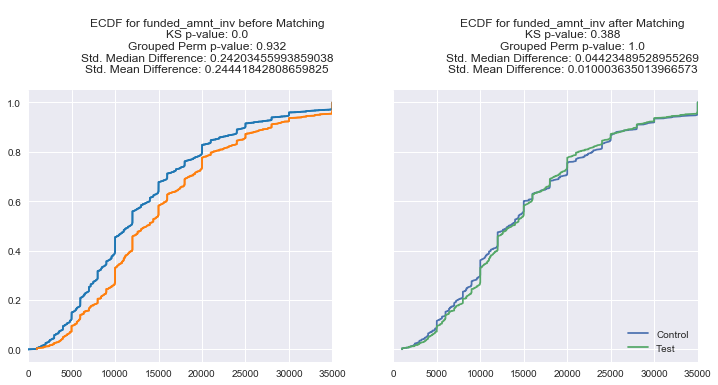

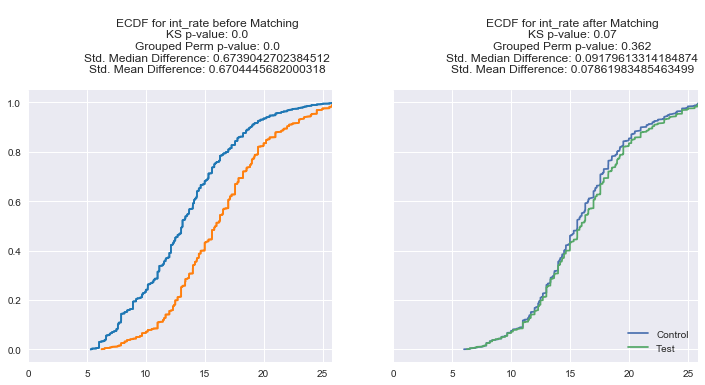

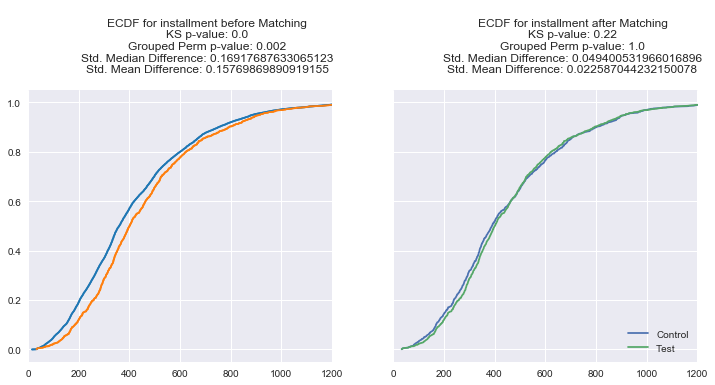

In [55]:
cc = m.compare_continuous(return_table=True)